<a href="https://colab.research.google.com/github/Aashi-sharma/ML-Algo-Identifier/blob/main/Algorithm_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
file_name=input('Enter your file name : ')
df=pd.read_csv(file_name)

Enter your file name : BAJFINANCE.csv


In [3]:
# replacing date column to Sno
if df.columns.any() == 'Date' and df.columns.any() !='Sno':
  df.insert(0, 'Sno', np.arange(len(df)))
  dates = df['Date']
  del df['Date']

In [4]:
  #replacing junk values by nan
junk_values=('*','?','#','+','-')
for i in range(0,len(df.columns)):
   for j in range(0,len(df.index)):
     if type(df.iloc[j,i])==str:
        s=df.iloc[j,i].startswith(junk_values)
        if  s==True:
           df=df.replace(df.iloc[j,i],np.nan)
print(df.head(10))
print(df.columns)


   Sno      Symbol Series  Prev Close   Open   High   Low   Last  Close  \
0    0  BAJAUTOFIN     EQ       46.95  49.45  50.75  46.5  50.75  50.75   
1    1  BAJAUTOFIN     EQ       50.75  53.20  53.20  47.9  48.00  48.10   
2    2  BAJAUTOFIN     EQ       48.10  46.55  47.40  44.6  44.60  44.60   
3    3  BAJAUTOFIN     EQ       44.60  43.50  46.00  42.1  46.00  45.25   
4    4  BAJAUTOFIN     EQ       45.25  48.00  48.00  42.0  42.90  42.90   
5    5  BAJAUTOFIN     EQ       42.90  42.05  44.90  41.0  43.00  42.90   
6    6  BAJAUTOFIN     EQ       42.90  42.00  42.00  39.5  40.25  40.10   
7    7  BAJAUTOFIN     EQ       40.10  40.00  40.00  39.0  39.00  39.00   
8    8  BAJAUTOFIN     EQ       39.00  40.00  41.00  38.5  39.50  39.50   
9    9  BAJAUTOFIN     EQ       39.50  39.00  40.50  39.0  39.90  39.90   

    VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  50.05    7600  3.803800e+10     NaN                 NaN          NaN  
1  48.56    5000  2.428000

In [5]:
#select nan values columns
nan_columns=df.columns[df.isnull().any()]
print(nan_columns)

Index(['Trades', 'Deliverable Volume', '%Deliverble'], dtype='object')


In [6]:
#filling missing values in data
from sklearn.impute import SimpleImputer
op = int(input("Do you want to fill nan values with...\n1. Mean\n2. Median\nEnter 1 or 2: "))
if op==1:
  imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
  imputer=imputer.fit(df[nan_columns])
  df[nan_columns]=imputer.transform(df[nan_columns])
  print("Nan values are filled with Mean..")
elif op==2:
  imputer=SimpleImputer(missing_values=np.nan,strategy='median')
  imputer=imputer.fit(df[nan_columns])
  df[nan_columns]=imputer.transform(df[nan_columns])
  print("Nan values are filled with Median..")
print(df)


Do you want to fill nan values with...
1. Mean
2. Median
Enter 1 or 2: 1
Nan values are filled with Mean..
       Sno      Symbol Series  Prev Close     Open     High      Low     Last  \
0        0  BAJAUTOFIN     EQ       46.95    49.45    50.75    46.50    50.75   
1        1  BAJAUTOFIN     EQ       50.75    53.20    53.20    47.90    48.00   
2        2  BAJAUTOFIN     EQ       48.10    46.55    47.40    44.60    44.60   
3        3  BAJAUTOFIN     EQ       44.60    43.50    46.00    42.10    46.00   
4        4  BAJAUTOFIN     EQ       45.25    48.00    48.00    42.00    42.90   
...    ...         ...    ...         ...      ...      ...      ...      ...   
5065  5065  BAJFINANCE     EQ     3492.05  3525.00  3660.00  3510.00  3658.00   
5066  5066  BAJFINANCE     EQ     3642.90  3665.00  3707.00  3631.00  3638.20   
5067  5067  BAJFINANCE     EQ     3645.55  3656.95  3668.40  3596.40  3636.00   
5068  5068  BAJFINANCE     EQ     3632.50  3650.00  3688.00  3617.05  3672.05   
50

In [7]:
# checking classification datatype string in each column
for i in range(len(df.columns)):
  if df.iloc[:, i].dtype == np.object:
    unique = np.unique(df.iloc[:, i])
    df.replace(unique, np.arange(len(unique)), inplace=True)

<ipython-input-7-e68174c53945>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df.iloc[:, i].dtype == np.object:


KFold

In [8]:
from  sklearn.model_selection import KFold
def kfold(X,Y,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=5)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    acc=(r2_score(Y_test,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_test,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score


def kfold_(X,Y,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)


  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=5)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_train)
    acc=(r2_score(Y_train,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_train,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score





Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
def train_test(X,Y,model):
  #size=float(input("Enter size of test data: \n"))

  Y=np.array(Y).astype(int)#cast pandas  object to integer
  Y=np.ravel(Y)#change a 2 dimensional or multi-dimensional array into a flattened array
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=10)
  regressor=model
  regressor.fit(X_train,Y_train)
  Y_pred_test=regressor.predict(X_test)
  Y_pred_train=regressor.predict(X_train)

  return Y_pred_test,Y_test,Y_train,Y_pred_train


Accuracy Function

In [10]:
from sklearn.metrics import r2_score
def accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  r_testing=(r2_score(Y_test,Y_pred_test))*100
  r_training=(r2_score(Y_train,Y_pred_train))*100
  print("Accuracy of training:",r_training)
  print("Accuracy of testing:",r_testing)
  return r_training,r_testing

Error Function

In [11]:
from sklearn import metrics
def error_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  rmse_training=np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
  rmse_testing=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
  print('Root Mean Squared Error of training:',np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))
  print('Root Mean Squared Error of testing:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))
  return rmse_training,rmse_testing


In [12]:

print("what you want to predict"+str(list(df)))
choice=str(input('Enter your choice:'))
Y=df.loc[:,choice]
df_X=df.drop(choice,axis=1)
X=df_X[list(df_X)]



what you want to predict['Sno', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
Enter your choice:Open


In [13]:
Algorithm=['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression']
Kfold_accuracy=[]
Kfold_error=[]
testing_accuracy=[]
testing_error=[]
training_accuracy=[]
training_error=[]

Scaling Data

In [14]:
Y_r=np.array(Y).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler().fit_transform(X)
sc_Y=StandardScaler().fit_transform(Y_r)

SVR

In [15]:
from sklearn.svm import SVR
model=SVR(kernel='rbf')
rmse_svr_Kfold,accuracy_svr_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_svr,r_testing_svr=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_svr,rmse_testing_svr=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_svr_Kfold)
Kfold_error.append(rmse_svr_Kfold)
testing_accuracy.append(r_testing_svr)
testing_error.append(rmse_testing_svr)
training_accuracy.append(r_training_svr)
training_error.append(rmse_training_svr)

<ipython-input-8-ae542b95dcf5>:42: RuntimeWarning: divide by zero encountered in double_scalars
  avg_acc_score=sum(acc_score)/s
<ipython-input-8-ae542b95dcf5>:46: RuntimeWarning: divide by zero encountered in double_scalars
  avg_rmse=sum(error_rmse)/s


Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 97.23956878771563
Accuracy of testing: 95.95324254407768
Root Mean Squared Error of training: 0.11327791517818217
Root Mean Squared Error of testing: 0.13223400309946076


Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=0)
rmse_random_Kfold,accuracy_random_Kfold=kfold(X,Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,model)
r_training_random,r_testing_random=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_random,rmse_testing_random=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_random_Kfold)
Kfold_error.append(rmse_random_Kfold)
testing_accuracy.append(r_testing_random)
testing_error.append(rmse_testing_random)
training_accuracy.append(r_training_random)
training_error.append(rmse_training_random)

<ipython-input-8-ae542b95dcf5>:16: RuntimeWarning: divide by zero encountered in double_scalars
  avg_acc_score=sum(acc_score)/s
<ipython-input-8-ae542b95dcf5>:20: RuntimeWarning: divide by zero encountered in double_scalars
  avg_rmse=sum(error_rmse)/s


Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 99.97057302331865
Accuracy of testing: 99.97819551558845
Root Mean Squared Error of training: 30.67948087385457
Root Mean Squared Error of testing: 26.077651108007775


Multiple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
rmse_multiple_Kfold,accuracy_multiple_Kfold=kfold(X,Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,model)
r_training_multiple,r_testing_multiple=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_multiple,rmse_testing_multiple=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_multiple_Kfold)
Kfold_error.append(rmse_multiple_Kfold)
testing_accuracy.append(r_testing_multiple)
testing_error.append(rmse_testing_multiple)
training_accuracy.append(r_training_multiple)
training_error.append(rmse_training_multiple)

Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 99.98737624954798
Accuracy of testing: 99.97898038915416
Root Mean Squared Error of training: 20.094138183218686
Root Mean Squared Error of testing: 25.604004530091583


<ipython-input-8-ae542b95dcf5>:16: RuntimeWarning: divide by zero encountered in double_scalars
  avg_acc_score=sum(acc_score)/s
<ipython-input-8-ae542b95dcf5>:20: RuntimeWarning: divide by zero encountered in double_scalars
  avg_rmse=sum(error_rmse)/s


KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
rmse_knn_Kfold,accuracy_knn_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_knn,r_testing_knn=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_knn,rmse_testing_knn=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_knn_Kfold)
Kfold_error.append(rmse_knn_Kfold)
testing_accuracy.append(r_testing_knn)
testing_error.append(rmse_testing_knn)
training_accuracy.append(r_training_knn)
training_error.append(rmse_training_knn)

<ipython-input-8-ae542b95dcf5>:42: RuntimeWarning: divide by zero encountered in double_scalars
  avg_acc_score=sum(acc_score)/s
<ipython-input-8-ae542b95dcf5>:46: RuntimeWarning: divide by zero encountered in double_scalars
  avg_rmse=sum(error_rmse)/s


Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 98.66646900024628
Accuracy of testing: 97.26117567970421
Root Mean Squared Error of training: 0.07873327934140907
Root Mean Squared Error of testing: 0.10878565864408424


Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
rmse_logistic_Kfold,accuracy_logistic_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_logistic,r_testing_logistic=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_logistic,rmse_testing_logistic=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_logistic_Kfold)
Kfold_error.append(rmse_logistic_Kfold)
testing_accuracy.append(r_testing_logistic)
testing_error.append(rmse_testing_logistic)
training_accuracy.append(r_training_logistic)
training_error.append(rmse_training_logistic)

Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 83.99762800295544
Accuracy of testing: 78.39371925099987
Root Mean Squared Error of training: 0.2727400801316672
Root Mean Squared Error of testing: 0.30554808430289704


<ipython-input-8-ae542b95dcf5>:42: RuntimeWarning: divide by zero encountered in double_scalars
  avg_acc_score=sum(acc_score)/s
<ipython-input-8-ae542b95dcf5>:46: RuntimeWarning: divide by zero encountered in double_scalars
  avg_rmse=sum(error_rmse)/s


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [22]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size, :],df1[training_size:len(df1), :1]

In [23]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX),numpy.array(dataY)

In [24]:
t_step=int(input("Enter the time steps"))
time_step=t_step
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

Enter the time steps5


In [25]:
print(X_train)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.34252962e-15
  5.62700937e-15]
 [0.00000000e+00 0.00000000e+00 5.34252962e-15 5.62700937e-15
  5.77493883e-15]
 [0.00000000e+00 5.34252962e-15 5.62700937e-15 5.77493883e-15
  5.29132327e-15]
 ...
 [1.00745657e-12 1.02185125e-12 1.02226659e-12 1.02093181e-12
  2.60599378e-11]
 [1.02185125e-12 1.02226659e-12 1.02093181e-12 2.60599378e-11
  2.33807671e-02]
 [1.02226659e-12 1.02093181e-12 2.60599378e-11 2.33807671e-02
  1.43446067e-12]]


In [26]:
print(X_test.shape),print(Y_test.shape)

(15204, 5)
(15204,)


(None, None)

In [27]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_train.shape[1],1)
print(Y_train)

[5.77493883e-15 5.29132327e-15 5.77493883e-15 ... 2.33807671e-02
 1.43446067e-12 2.09990431e-11]


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional

In [29]:
from keras.models import Sequential
from keras.layers import Dropout
model=Sequential()
model.add(LSTM(100, activation='tanh', recurrent_activation='hard_sigmoid',input_shape=(t_step,1)))
model.add(Dense(50 ))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Dense(1,activation='linear'))

In [30]:
model.compile(optimizer='RMSprop',loss='mean_squared_error')
history=model.fit(X_train,Y_train,batch_size=100,epochs=11,shuffle=False)
print(history)

Epoch 1/11
609/609 [==============================] - 11s 14ms/step - loss: 7.2176e-05
Epoch 2/11
609/609 [==============================] - 10s 16ms/step - loss: 2.9577e-05
Epoch 3/11
609/609 [==============================] - 10s 16ms/step - loss: 1.8526e-05
Epoch 4/11
609/609 [==============================] - 8s 13ms/step - loss: 1.3553e-05
Epoch 5/11
609/609 [==============================] - 10s 16ms/step - loss: 1.1268e-05
Epoch 6/11
609/609 [==============================] - 10s 16ms/step - loss: 9.5022e-06
Epoch 7/11
609/609 [==============================] - 8s 13ms/step - loss: 8.4924e-06
Epoch 8/11
609/609 [==============================] - 10s 16ms/step - loss: 7.6307e-06
Epoch 9/11
609/609 [==============================] - 10s 16ms/step - loss: 7.0085e-06
Epoch 10/11
609/609 [==============================] - 9s 14ms/step - loss: 6.3494e-06
Epoch 11/11
609/609 [==============================] - 9s 16ms/step - loss: 5.9159e-06


In [31]:
import math
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],-1))
score_train=model.evaluate(X_train,Y_train,batch_size=1)
score_test=model.evaluate(X_test,Y_test,batch_size=1)
print("in train MSE=",round(score_train,4))
print("in test MSE=",score_test)
rmse_train = math. sqrt(score_train)
rmse_test = math. sqrt(score_test)
print("Train RMSE",round(rmse_train,4))
print("test RMSE",rmse_test)

15204/15204 [==============================] - 48s 3ms/step - loss: 0.0011
in train MSE= 0.0
in test MSE= 0.0010874686995521188
Train RMSE 0.0054
test RMSE 0.032976790316101394


In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 48451 (189.26 KB)
Trainable params: 48451 

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape)
print(test_predict.shape)
train_predict=train_predict.reshape(-1,1)
test_predict=test_predict.reshape(-1,1)
print(train_predict.shape)
print(test_predict.shape)


476/476 [==============================] - 1s 3ms/step
(60834, 1)
(15204, 1)
(60834, 1)
(15204, 1)


In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)


(60834, 1)
(15204, 1)


In [35]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(Y_train.shape)
print(train_predict.shape)

(60834,)
(60834, 1)


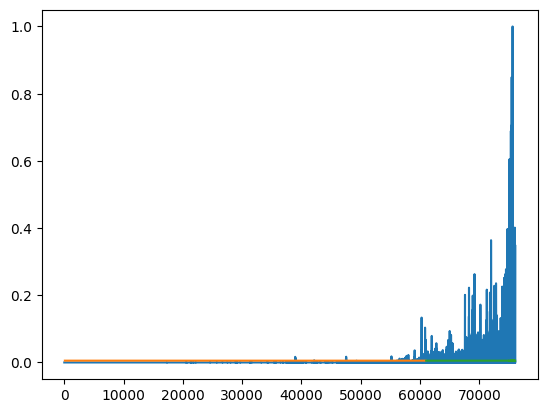

In [37]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan

# Adjust the indices to match the size of test_predict
testPredictPlot[len(train_predict) + (look_back*2) + 1 : len(df1), :] = test_predict[:len(df1) - (len(train_predict) + (look_back*2) + 1), :]

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [38]:
X_input=test_data[947 :].reshape(1,-1)
X_input.shape

(1, 14263)

In [39]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [46]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 3:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Take the last n_steps elements
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))  # Adjust reshaping for the current length
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat[0]))
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)




0 day input [3.91444130e-13 3.84616616e-13 3.85754535e-13 3.85674881e-13
 3.88528781e-13 2.98974671e-10 1.02081182e-01 1.01686716e-11
 2.71409608e-11 1.03323044e-17 5.76242172e-13 1.13791898e-16
 0.00000000e+00 3.85674881e-13 3.87233830e-13 3.99978522e-13
 3.87011935e-13 3.97475100e-13 3.97366998e-13 3.94807818e-13
 7.06144272e-10 2.45001138e-01 2.37422244e-11 1.11877350e-10
 1.80246367e-17 5.76355964e-13 1.13791898e-16 0.00000000e+00
 3.97366998e-13 4.01116441e-13 4.16478347e-13 3.99409563e-13
 4.16250764e-13 4.14532506e-13 4.07274859e-13 1.12131333e-09
 4.01332028e-01 3.86681939e-11 1.70495425e-10 1.72963685e-17
 5.76469756e-13 1.13791898e-16 0.00000000e+00 4.14532506e-13
 4.17047307e-13 4.21826567e-13 4.13178382e-13 4.13997684e-13
 4.14834054e-13 4.17408027e-13 7.58461236e-10 2.78216462e-01
 2.43507835e-11 1.07461996e-10 1.61243120e-17 5.76583548e-13
 1.13791898e-16 0.00000000e+00 4.14834054e-13 4.16131282e-13
 4.17434199e-13 4.09241183e-13 4.13747342e-13 4.13349070e-13
 4.13193175e

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,104)

In [48]:
df3=df1.tolist()
df3.extend(lst_output)

In [49]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,test_predict)
print(r2)
MAPE_value=np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print(MAPE_value)

-0.0005109001128669188


<ipython-input-49-e0759cd69d4c>:4: RuntimeWarning: divide by zero encountered in divide
  MAPE_value=np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100


inf


In [50]:
len(df1)

76050

In [62]:
#plt.plot(day_new,scaler.inverse_transform(df1[5135:]))
#print(day_pred),print(lst_output)
#plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [63]:
#plt.plot(day_new[:len(df1[5135:])], scaler.inverse_transform(df1[5135:]))
#print(day_pred)
#print(lst_output)
#plt.plot(day_pred[:len(lst_output)], scaler.inverse_transform(lst_output))




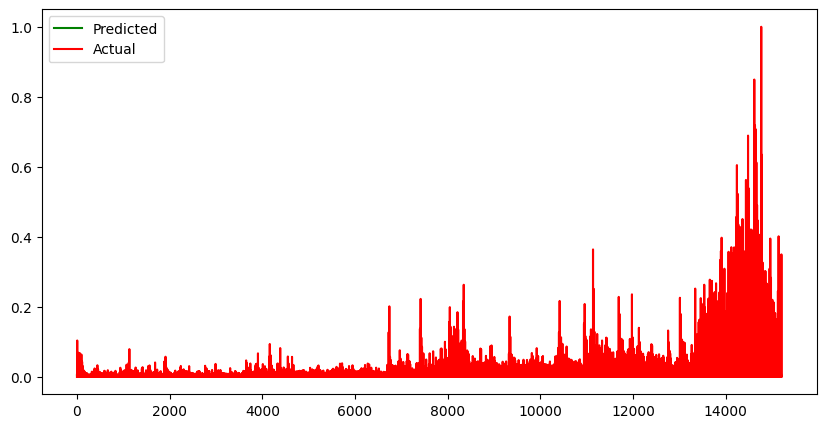

In [64]:
plt.figure(figsize=(10, 5))

# Plot both predicted and actual values
plt.plot(test_predict, label="Predicted", c="g")
plt.plot([row[0] for row in y_test], label="Actual", c='r')

plt.legend()
plt.show()



In [65]:
df_table=pd.DataFrame({'Algorithm':['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression'],'KFold_Accuracy':Kfold_accuracy,'KFold Error':Kfold_error,'Training_Accuracy':training_accuracy,
                        'Traning Error':training_error,'Testing_Accuracy':testing_accuracy,'Testing Error':testing_error})
print(df_table)

             Algorithm  KFold_Accuracy  KFold Error  Training_Accuracy  \
0                  SVR             inf          inf          97.239569   
1        Random Forest             inf          inf          99.970573   
2  Multiple Regression             inf          inf          99.987376   
3                  KNN             inf          inf          98.666469   
4   LogisticRegression             inf          inf          83.997628   

   Traning Error  Testing_Accuracy  Testing Error  
0       0.113278         95.953243       0.132234  
1      30.679481         99.978196      26.077651  
2      20.094138         99.978980      25.604005  
3       0.078733         97.261176       0.108786  
4       0.272740         78.393719       0.305548  


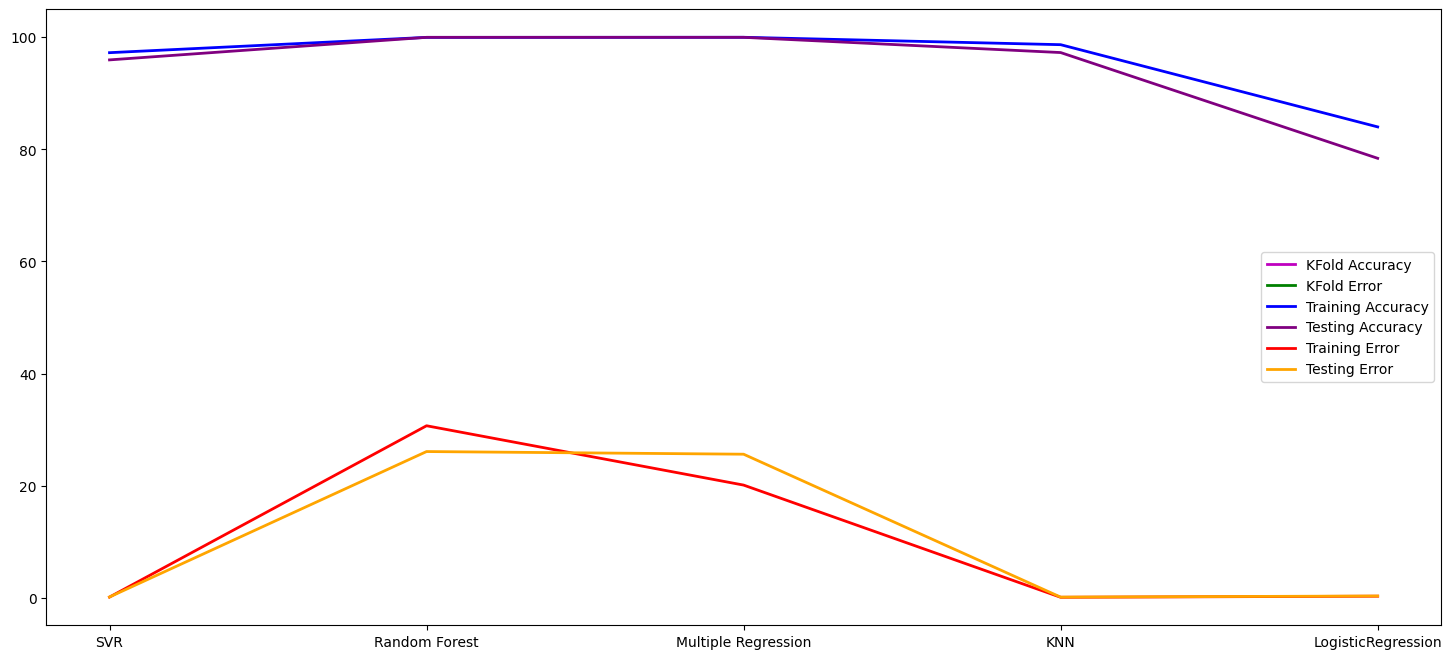

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(Algorithm,Kfold_accuracy,color='m',linewidth=2,label='KFold Accuracy')
plt.plot(Algorithm,Kfold_error,color='green',linewidth=2,label='KFold Error')
plt.plot(Algorithm,training_accuracy,color='blue',linewidth=2,label='Training Accuracy')
plt.plot(Algorithm,testing_accuracy,color='purple',linewidth=2,label='Testing Accuracy')
plt.plot(Algorithm,training_error,color='red',linewidth=2,label='Training Error')
plt.plot(Algorithm,testing_error,color='orange',linewidth=2,label='Testing Error')
plt.legend()

In [67]:
print("Sort your list by"+str(list(df_table)))
s=str(input('Enter your choice:'))#Enter string
sorted_df=df_table.sort_values(s,ascending=False,axis=0)
print(sorted_df)


Sort your list by['Algorithm', 'KFold_Accuracy', 'KFold Error', 'Training_Accuracy', 'Traning Error', 'Testing_Accuracy', 'Testing Error']
Enter your choice:Algorithm
             Algorithm  KFold_Accuracy  KFold Error  Training_Accuracy  \
0                  SVR             inf          inf          97.239569   
1        Random Forest             inf          inf          99.970573   
2  Multiple Regression             inf          inf          99.987376   
4   LogisticRegression             inf          inf          83.997628   
3                  KNN             inf          inf          98.666469   

   Traning Error  Testing_Accuracy  Testing Error  
0       0.113278         95.953243       0.132234  
1      30.679481         99.978196      26.077651  
2      20.094138         99.978980      25.604005  
4       0.272740         78.393719       0.305548  
3       0.078733         97.261176       0.108786  


In [68]:
best_algo=sorted_df.loc[0,'Algorithm']
print('Best algorithm for your dataset is',best_algo)

Best algorithm for your dataset is SVR
